### Salary_hike -> Build a prediction model for Salary_hike

In [67]:
# importing imp library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
# loading a dataset
df=pd.read_csv('Salary_Data.csv')

In [69]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [70]:
# EDA

In [71]:
df.shape

(30, 2)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [73]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [74]:
# checking for null values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [75]:
# finding correlation between target and feature
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


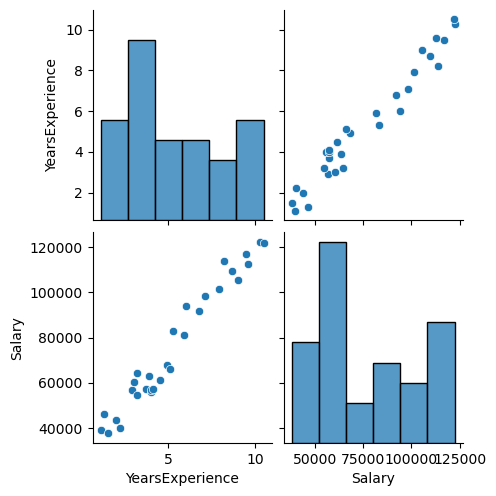

In [76]:
sns.pairplot(df)

C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


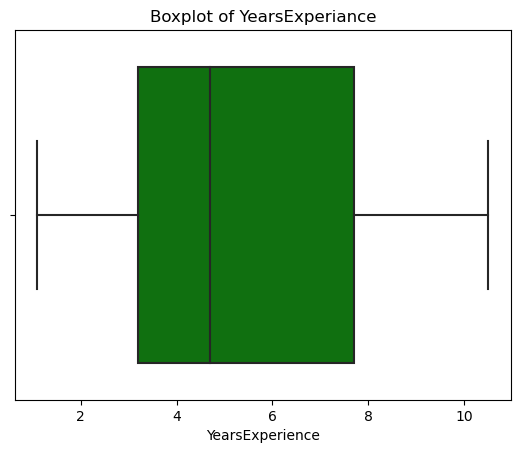

In [77]:
#boxplot of years 0f experience time
sns.boxplot(df['YearsExperience'],color='green')
plt.title('Boxplot of YearsExperiance')
plt.show()

C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


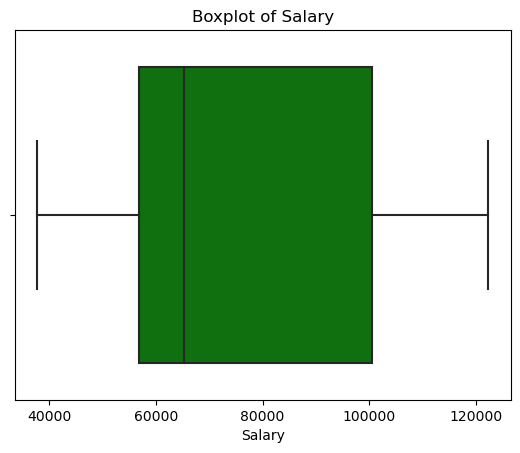

In [78]:
#boxplot of salary
sns.boxplot(df['Salary'],color='green')
plt.title('Boxplot of Salary')
plt.show()

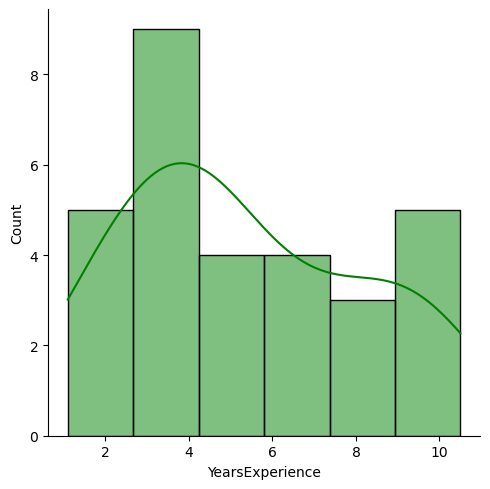

In [81]:
sns.displot(data=df,x='YearsExperience',color='green',kde=True)

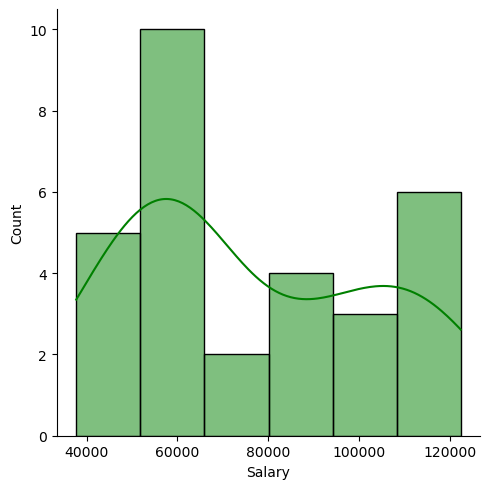

In [82]:
sns.displot(data=df,x='Salary',color='green',kde=True)

In [83]:
# spliting in to target and feature
x=pd.DataFrame(df['YearsExperience'])
y=pd.DataFrame(df['Salary'])

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


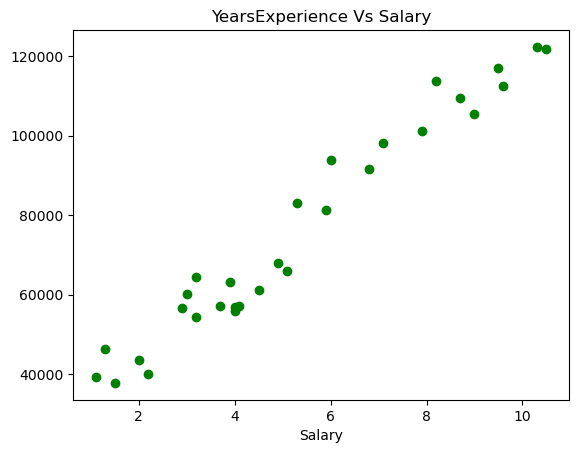

In [105]:
# plotting scatter plot
plt.scatter(df['YearsExperience'],df['Salary'],color='Green')
plt.xlabel('YearsExperience')
plt.xlabel('Salary')
plt.title('YearsExperience Vs Salary')
plt.show()

In [86]:
# splitting data in to train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [87]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(6, 1)
(24, 1)
(6, 1)


In [88]:
# Train the algorithm
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [89]:
# Rerive the intercept
b=lr.intercept_
b

array([24393.16915195])

In [90]:
# Retrieve the slope
m=lr.coef_
m

array([[9569.58688543]])

In [92]:
X_test

,YearsExperience
1,1.3
0,1.1
14,4.5
9,3.7
21,7.1
19,6.0


In [91]:
# Predicted Value
y_pred=lr.predict(X_test)
y_pred
pd.DataFrame(data=y_pred,columns=['predicted value of Salary'])

,predicted value of Salary
0,36833.632103
1,34919.714726
2,67456.310136
3,59800.640628
4,92337.236039
5,81810.690465


In [93]:
#Actual value of Delivery Time
y_test

,Salary
1,46205.0
0,39343.0
14,61111.0
9,57189.0
21,98273.0
19,93940.0


In [94]:
# Evaluate the alogorithm
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Eroor:',metrics.mean_squared_error(y_test,y_pred))
print('Mean Absolute Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 6802.779572073898
Mean Squared Eroor: 56137509.9978255
Mean Absolute Error: 7492.496913434499


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

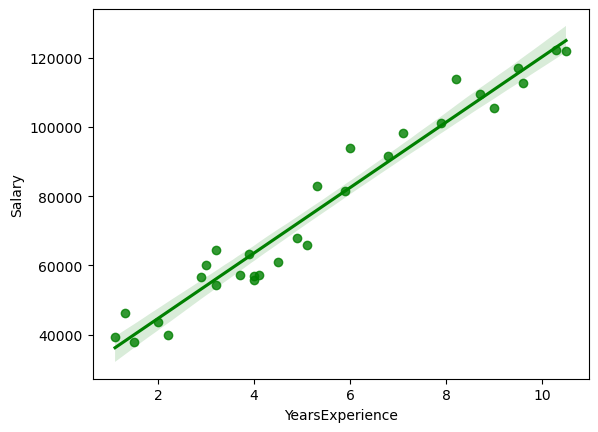

In [107]:
sns.regplot(x=df['YearsExperience'],y=df['Salary'],color='Green',marker='o')

In [98]:
# predicting For individual value for Delivery Time
# y = mx + b

In [99]:
y=m * 7 + b
m * 2 + b

array([[43532.34292281]])

In [100]:
m * 4.0 + b

array([[62671.51669368]])